## Installation of required libraries

In [ ]:
!pip3 install pyspark==3.2.4 nltk pyenchant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.5/281.5 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 25.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.4-py2.py3-none-any.whl size=282040925 sha256=93033f3850776488fcb5e4220a37203363e72fdcb8f2d76d145bfe6d9e3238d3
  Stored in directory: /root/.cache/pip/wheels/e7/e3/c8/c358dac750f2b6a4b03328d10e05a5c69501664bd6504b6c3e
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-${SPARK_VERSION}/spark-${SPARK_VERSION}-bin-hadoop${HADOOP_VERSION}.tgz && \
    tar -xzf spark-3.2.4-bin-hadoop3.2.tgz && \
    mv spark-3.2.4-bin-hadoop3.2 spark && \
    rm spark-3.2.4-bin-hadoop3.2.tgz

In [ ]:
cd /content/drive/MyDrive/naive-bayes-ensemble-in-pyspark-main

/content/drive/MyDrive/naive-bayes-ensemble-in-pyspark-main


In [ ]:
!apt-get install -y enchant

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.7-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.7-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,316 kB of archives.
After this operation, 5,474 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libtext-iconv-perl amd64 1.7-7 [13.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libaspell15 amd64 0.60.8-1ubuntu0.1 [328 kB]
Get:3 http://archive.ubu

##Training and evaluation of Naive Bayes Classifier

In [ ]:
!python main.py

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/14 02:54:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Loading data...
Preprocessing data...
Splitting data into training and testing set...
Training multinomial naive bayse on IMBD data...
Writing learned parameters to a json file...
Calculating test accuracy...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Test Accuracy: 0.8462983097756251
Calculating precision...
Precision: 0.862999372

## Confusion Matrix

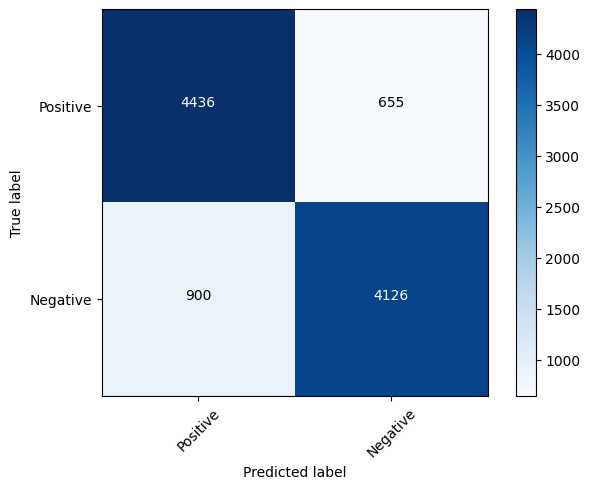

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plotConfusionMatrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

# Example usage
cm = np.array([[4436,  655],[ 900, 4126]])
classes = ['Positive', 'Negative']

plt.figure()
plotConfusionMatrix(cm, classes)
plt.show()

In [ ]:
import json
with open('parameters.json', "r") as outfile:
  parameters = json.loads(outfile.read())

##Invariance Test

In [ ]:
from multinomialNaiveBayes import predict
review = "The movie John Wick was bad"
print("Sentiment: ",predict(review, parameters))

Sentiment:  negative


In [ ]:
from multinomialNaiveBayes import predict
review = "The movie Doctor Strange was terrible"
print("Sentiment: ",predict(review, parameters))

Sentiment:  negative


##Example that was classified incorrectly and requires future work

In [ ]:
from multinomialNaiveBayes import predict
review = "The movie setting was incredibly out of place"
print("Sentiment: ",predict(review, parameters))

Sentiment:  positive


##Example which depicts the need for neutral sentiment

In [ ]:
from multinomialNaiveBayes import predict
review = "The movie was intriguing"
print("Sentiment: ",predict(review, parameters))

Sentiment:  positive
